In [1]:
#Math stuff
from numpy.random import seed
from numpy.random import randn
from scipy import stats
import numpy as np
import math  

#Visualization stuff
import seaborn as sns
#sns.set(style="darkgrid")
sns.set(style="whitegrid")
sns.set(font_scale=1.4)
from matplotlib import pyplot as plt

import pandas as pd
import os

from matplotlib.ticker import FuncFormatter

In [2]:
#visualize open cloud predictions...

In [3]:
#import open cloud data
#check list of files in data 
directory = "./data/predictions/"
print(os.listdir(directory))

['50x_Aggregate_Summary_open_cloud_11-16-2019 - OpenCloud Predictions.csv']


In [4]:
#import each summary data
data_name = '50x_Aggregate_Summary_open_cloud_11-16-2019 - OpenCloud Predictions.csv'

In [28]:
#add csvs to data frames
df = pd.read_csv(directory + data_name, header = 0)

In [29]:
df.head()

,Prediction,instanceID,iperf.total(missing2),ycruncher.avg wallTime,sysbnech.avg wallTime,pgbench.avg transactions
0,16.712942,i-0062d028d4b1b0c17,1534.7,5.384865,8.011599,159093.7
1,32.078517,i-0069a2fb2881e526e,1536.0,5.907727,9.048397,145564.0
2,32.226975,i-0096e0731defa5bcf,1494.8,5.934528,9.048581,144451.6
3,12.064033,i-0098bacd16b57b4dc,1501.7,4.802716,7.783735,165235.5
4,11.689925,i-00a374920f339188c,1557.2,5.019340,7.780997,165764.5


In [30]:
#rename columns
df = df.rename(columns = {'Prediction' : 'prediction', 'iperf.total(missing2)': 'iperf' , 'ycruncher.avg wallTime': 'ycruncher','sysbnech.avg wallTime':'sysbench', 'pgbench.avg transactions':'pgbench'})

In [31]:
df.prediction.describe()

count    50.000000
mean     22.715482
std       8.419851
min      10.137233
25%      15.487000
50%      24.329925
75%      31.993315
max      33.162633
Name: prediction, dtype: float64

In [32]:
df

,prediction,instanceID,iperf,ycruncher,sysbench,pgbench
0,16.712942,i-0062d028d4b1b0c17,1534.7,5.384865,8.011599,159093.7
1,32.078517,i-0069a2fb2881e526e,1536.0,5.907727,9.048397,145564.0
2,32.226975,i-0096e0731defa5bcf,1494.8,5.934528,9.048581,144451.6
3,12.064033,i-0098bacd16b57b4dc,1501.7,4.802716,7.783735,165235.5
4,11.689925,i-00a374920f339188c,1557.2,5.019340,7.780997,165764.5
5,24.317358,i-00b268a4ae508cf2f,1494.0,5.315410,8.010992,150846.5
6,31.876933,i-00c650a5bff4bf46c,1500.6,5.818474,9.046013,145991.2
7,32.017617,i-0127ff963ce39608f,1531.9,5.913182,9.045970,145822.1
8,11.983925,i-01630b674435938c1,1521.8,4.803216,7.783168,165574.8
9,31.660908,i-018b98b01134abbc5,1514.4,5.793915,9.048704,144316.7


In [33]:
#round prediction to int
df= df.round({'prediction': 0})

In [34]:
df

,prediction,instanceID,iperf,ycruncher,sysbench,pgbench
0,17.0,i-0062d028d4b1b0c17,1534.7,5.384865,8.011599,159093.7
1,32.0,i-0069a2fb2881e526e,1536.0,5.907727,9.048397,145564.0
2,32.0,i-0096e0731defa5bcf,1494.8,5.934528,9.048581,144451.6
3,12.0,i-0098bacd16b57b4dc,1501.7,4.802716,7.783735,165235.5
4,12.0,i-00a374920f339188c,1557.2,5.019340,7.780997,165764.5
5,24.0,i-00b268a4ae508cf2f,1494.0,5.315410,8.010992,150846.5
6,32.0,i-00c650a5bff4bf46c,1500.6,5.818474,9.046013,145991.2
7,32.0,i-0127ff963ce39608f,1531.9,5.913182,9.045970,145822.1
8,12.0,i-01630b674435938c1,1521.8,4.803216,7.783168,165574.8
9,32.0,i-018b98b01134abbc5,1514.4,5.793915,9.048704,144316.7


In [45]:
sns.set(font_scale=1.4)



In [50]:
def showGraph(bin_count):
    fig, ax = plt.subplots()
    plt.hist(df.prediction, bins=bin_count)

    ax.set_xlabel("VM-Tenancy", fontsize=20)
    ax.set_ylabel("Frequency Occurrence", fontsize=20)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:0.0f}'.format(y))) 
    plt.xlim(0, None)
    plt.show()

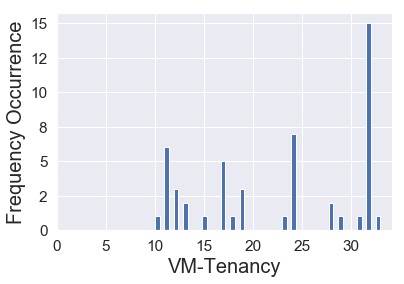

In [51]:
#48bin
showGraph(48)

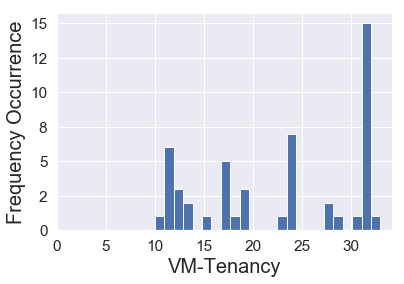

In [52]:
#show histogram by 24
showGraph(24)

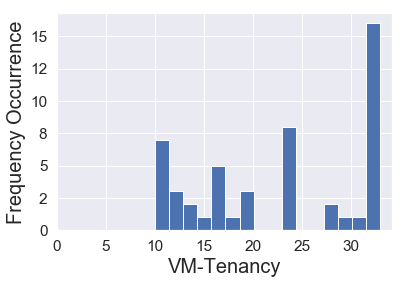

In [53]:
#show histogram by 16
showGraph(16)

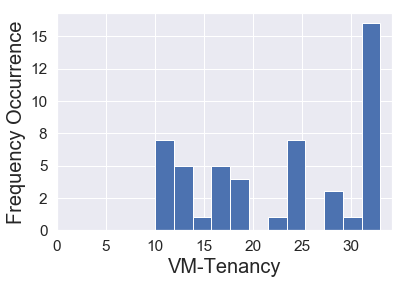

In [54]:
#show histogram by 12
showGraph(12)

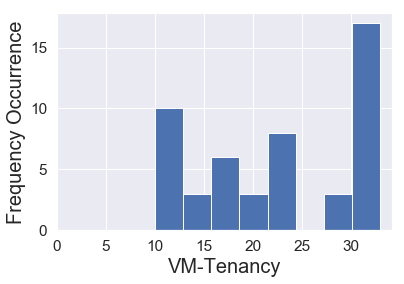

In [55]:
#show histogram by 8
showGraph(8)

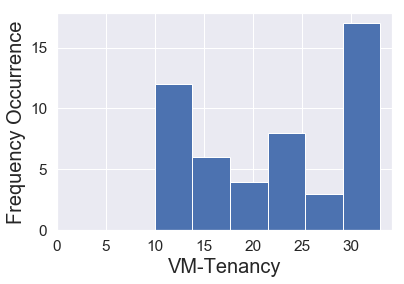

In [56]:
#show histogram by 6
showGraph(6)

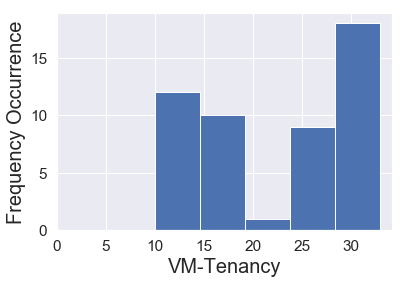

In [57]:
#show histogram by 5
showGraph(5)

With a mean of 22.715, and a spread of 10 vm-tenancy to 33 vm-tenancy, we can see a variety of predicted vm-tenancy  with our model.

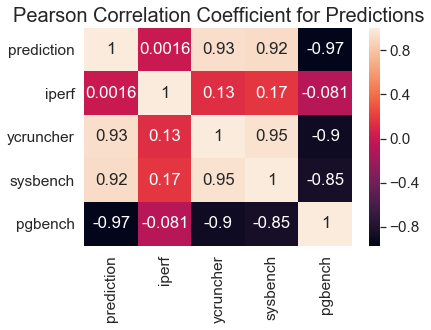

In [19]:
#pearson correlation 
fig, ax = plt.subplots()
sns.heatmap(df.corr(), annot=True)
ax.set_title("Pearson Correlation Coefficient for Predictions", fontsize=20)
plt.show()